In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.github.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.github.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.github.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_4.csv"
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

      
      


In [3]:
#nomeando cada loja
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'


In [4]:
#criando uma tabela para todas as lojas para facilitar a anál
total_lojas= pd.concat([loja,loja2,loja3,loja4], ignore_index=True)

In [5]:
#criando uma coluna faturamento total
total_lojas['Faturamento total'] = total_lojas['Preço'] + total_lojas['Frete']


In [6]:
#mostrando a nova tabela
total_lojas

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja,Faturamento total
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1,228.329790
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1,267.584305
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1,300.772681
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1,1064.657344
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1,473.954689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 4,320.452799
9431,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 4,480.832798
9432,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4,52.129675
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 4,213.512979


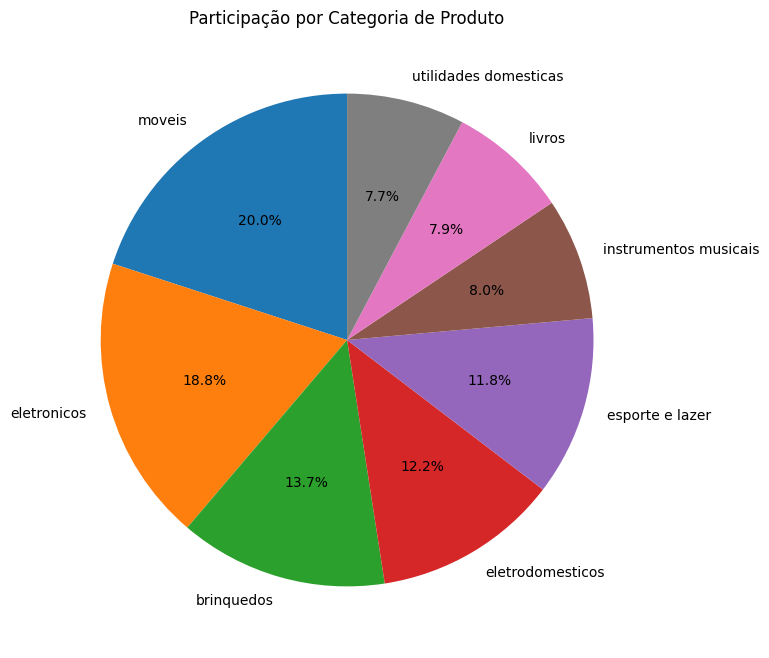

In [7]:
# criação dos gráficos para as tabelas

import matplotlib.pyplot as plt
import seaborn as sns


# Contar quantos produtos foram vendidos por categoria
categorias = total_lojas['Categoria do Produto'].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=90)
plt.title('Participação por Categoria de Produto')
plt.show()


In [8]:
# uma análise para todas as lojas em conjunto tivemos a percepção de que as categorias mais vendidas, considerando as 3 mais vendidas, são de moveis, eletronicos e brinquedos

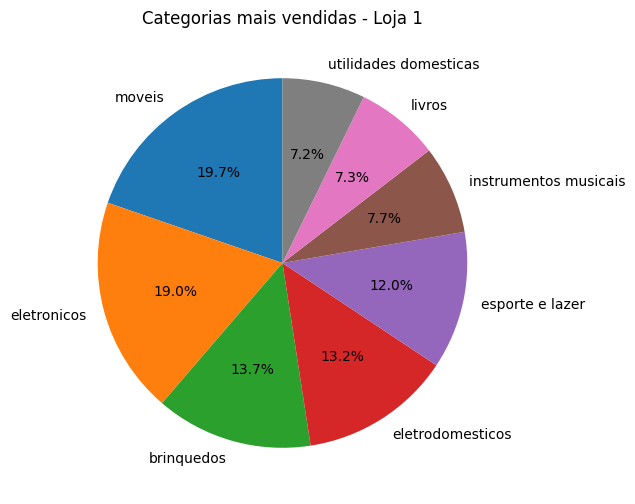

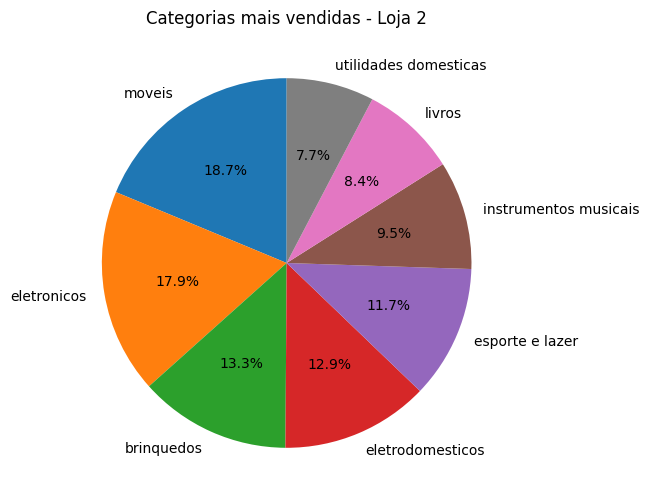

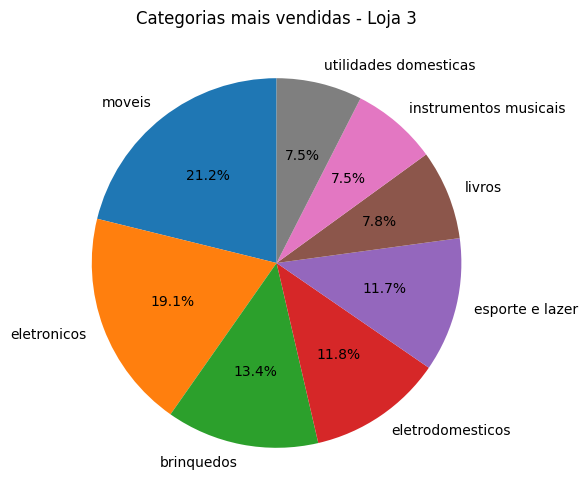

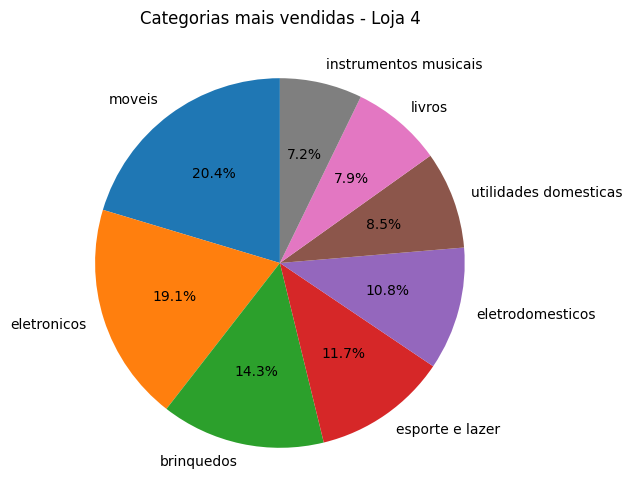

In [9]:
#categorias mais vendidas por loja

for loja_nome in total_lojas['Loja'].unique():
    dados_loja = total_lojas[total_lojas['Loja'] == loja_nome]
    categorias = dados_loja['Categoria do Produto'].value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Categorias mais vendidas - {loja_nome}')
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_3492\3428579092.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


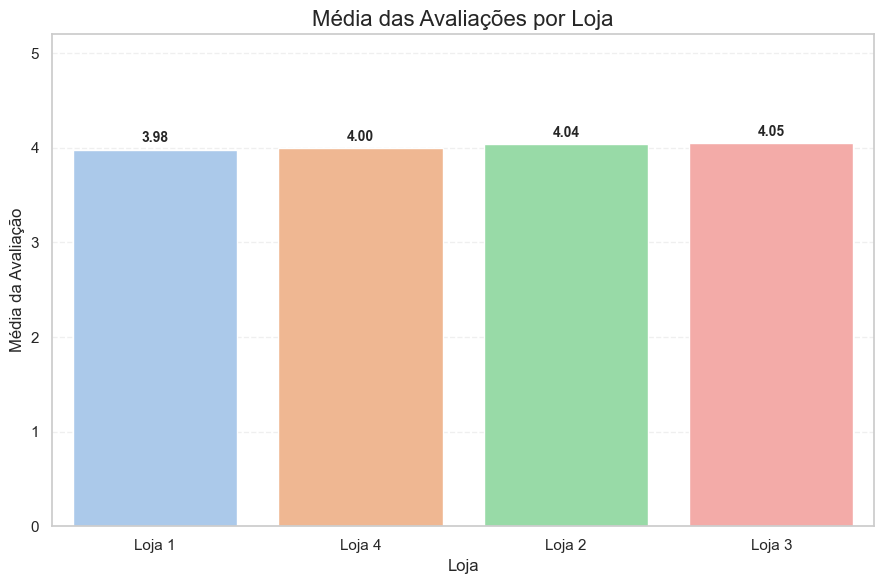

In [10]:


# Calcular média de avaliações por loja
media_avaliacoes = total_lojas.groupby("Loja")["Avaliação da compra"].mean().sort_values().reset_index()

# Configurar estilo e paleta
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))
cores = sns.color_palette("pastel", n_colors=media_avaliacoes.shape[0])

# Criar gráfico
ax = sns.barplot(
    data=media_avaliacoes,
    x="Loja",
    y="Avaliação da compra",
    palette=cores
)

# Adicionar valores acima das barras
for i, row in media_avaliacoes.iterrows():
    ax.text(
        i,
        row["Avaliação da compra"] + 0.05,  # posição um pouco acima da barra
        f"{row['Avaliação da compra']:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Ajustes estéticos
plt.title("Média das Avaliações por Loja", fontsize=16)
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Média da Avaliação", fontsize=12)
plt.ylim(0, 5.2)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



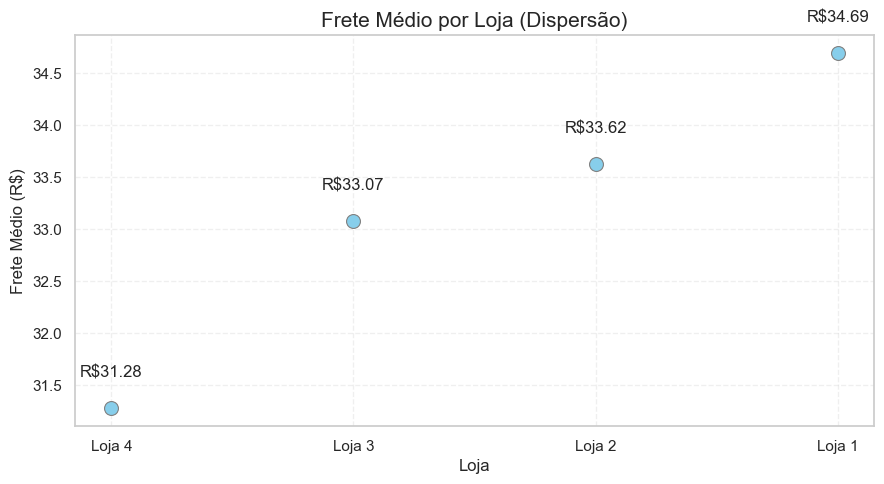

In [11]:
# Calcular frete medio por loja
media_frete = total_lojas.groupby("Loja")["Frete"].mean().sort_values().reset_index()

#criando um gráfico de dispersão

plt.figure(figsize=(9, 5))
cores = sns.color_palette("pastel", n_colors=len(media_frete))

sns.scatterplot(
    data=media_frete,
    x="Loja",
    y="Frete",
    s=100,  # tamanho dos pontos
    color="skyblue",
    edgecolor="gray"
)

# Adiciona valor ao lado dos pontos
for i, row in media_frete.iterrows():
    plt.text(i, row["Frete"] + 0.3, f"R${row['Frete']:.2f}", ha='center')

plt.title("Frete Médio por Loja (Dispersão)", fontsize=15)
plt.ylabel("Frete Médio (R$)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [12]:
# a loja 4 possuí o menor frete, mas existe um meio termo na loja 3.

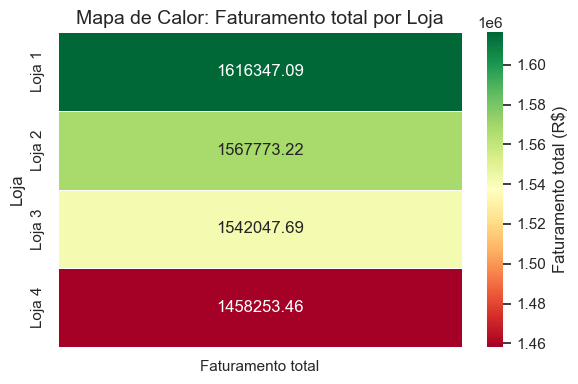

In [13]:
#analisando faturamento por loja

# Agrupa os valores por loja
faturamento_matriz = total_lojas.groupby("Loja")[["Faturamento total"]].sum().sort_values("Faturamento total", ascending=False)

#fazendo gráfico de temperatura

plt.figure(figsize=(6, len(faturamento_matriz) * 1))  # altura ajustada ao número de lojas
sns.set(style="white")

ax = sns.heatmap(
    faturamento_matriz,
    annot=True, fmt=".2f", linewidths=0.5,
    cmap="RdYlGn",  # vermelho (baixo) a verde (alto) em tons pastéis
    cbar_kws={'label': 'Faturamento total (R$)'}
)

plt.title("Mapa de Calor: Faturamento total por Loja", fontsize=14)
plt.xlabel("")
plt.ylabel("Loja")
plt.tight_layout()
plt.show()



In [14]:
# A loja 1 saiu em vantagem no quesito faturamento.

In [15]:
# produtos mais e menos vendidos

# mais vendidos
mais_vendidos = total_lojas['Produto'].value_counts().reset_index() 
mais_vendidos.columns = ['Produto', 'Quantidade Vendida']

mais_vendidos


,Produto,Quantidade Vendida
0,Cômoda,210
1,Carrinho controle remoto,206
2,Micro-ondas,206
3,Bateria,203
4,Cama king,201
5,Secadora de roupas,200
6,Modelagem preditiva,200
7,Jogo de panelas,200
8,Cama box,199
9,Blocos de montar,199


In [16]:
# produtos mais e menos vendidos

# mais vendidos
# Agrupar por loja e produto, contando quantas vezes cada produto foi vendido em cada loja
produtos_por_loja = total_lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade Vendida')

# Lista com os nomes das lojas
lojas = produtos_por_loja['Loja'].unique()

# Mostrar os top 5 de cada loja
for loja in lojas:
    print(f"\nTop 5 produtos mais vendidos - {loja}")
    top = produtos_por_loja[produtos_por_loja['Loja'] == loja] \
        .sort_values(by='Quantidade Vendida', ascending=False).head(5)
    print(top)



Top 5 produtos mais vendidos - Loja 1
      Loja             Produto  Quantidade Vendida
47  Loja 1       TV Led UHD 4K                  60
37  Loja 1         Micro-ondas                  60
24  Loja 1       Guarda roupas                  60
43  Loja 1  Secadora de roupas                  58
3   Loja 1    Blocos de montar                  56

Top 5 produtos mais vendidos - Loja 2
       Loja                   Produto  Quantidade Vendida
79   Loja 2  Iniciando em programação                  65
88   Loja 2               Micro-ondas                  62
52   Loja 2                   Bateria                  61
100  Loja 2                    Violão                  58
91   Loja 2                  Pandeiro                  58

Top 5 produtos mais vendidos - Loja 3
       Loja          Produto  Quantidade Vendida
134  Loja 3    Kit banquetas                  57
138  Loja 3   Mesa de jantar                  56
111  Loja 3        Cama king                  56
119  Loja 3           Cômoda     

      Loja   Categoria do Produto  Quantidade Vendida
0   Loja 1             brinquedos                 324
1   Loja 1       eletrodomesticos                 312
2   Loja 1            eletronicos                 448
3   Loja 1        esporte e lazer                 284
4   Loja 1  instrumentos musicais                 182
5   Loja 1                 livros                 173
6   Loja 1                 moveis                 465
7   Loja 1  utilidades domesticas                 171
8   Loja 2             brinquedos                 313
9   Loja 2       eletrodomesticos                 305
10  Loja 2            eletronicos                 422
11  Loja 2        esporte e lazer                 275
12  Loja 2  instrumentos musicais                 224
13  Loja 2                 livros                 197
14  Loja 2                 moveis                 442
15  Loja 2  utilidades domesticas                 181
16  Loja 3             brinquedos                 315
17  Loja 3       eletrodomes

C:\Users\User\AppData\Local\Temp\ipykernel_3492\3370674225.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dados_loja, x='Categoria do Produto', y='Quantidade Vendida', palette='viridis')


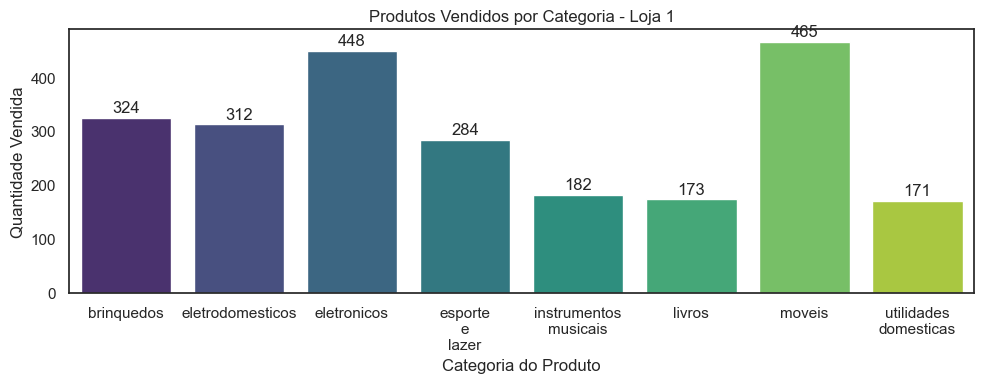

C:\Users\User\AppData\Local\Temp\ipykernel_3492\3370674225.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dados_loja, x='Categoria do Produto', y='Quantidade Vendida', palette='viridis')


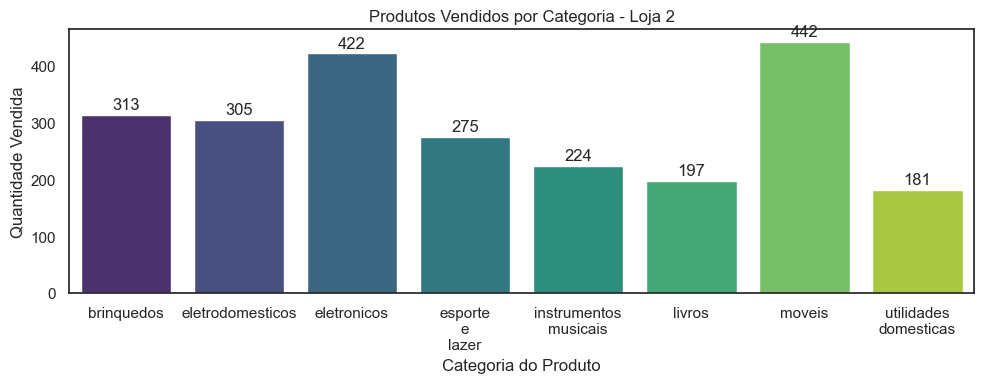

C:\Users\User\AppData\Local\Temp\ipykernel_3492\3370674225.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dados_loja, x='Categoria do Produto', y='Quantidade Vendida', palette='viridis')


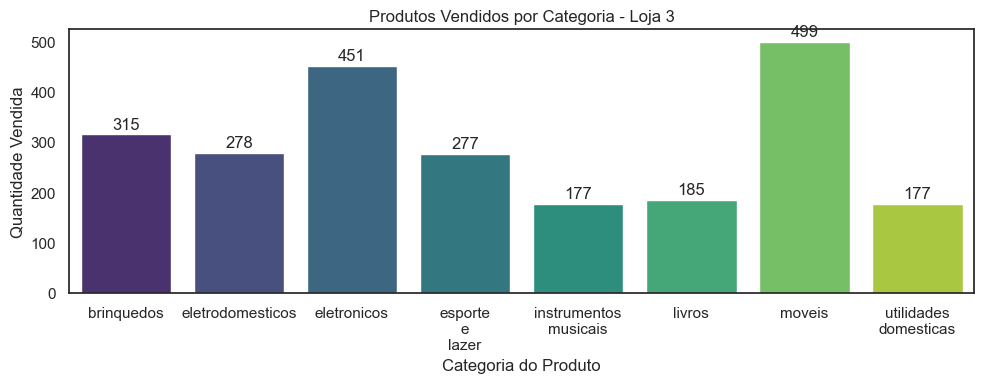

C:\Users\User\AppData\Local\Temp\ipykernel_3492\3370674225.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dados_loja, x='Categoria do Produto', y='Quantidade Vendida', palette='viridis')


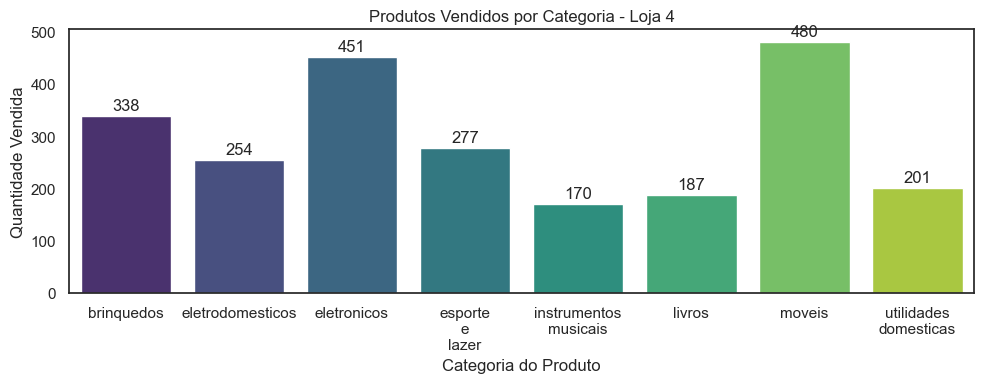

In [22]:
#quantidade de vendas por categoria de cada loja


# Agrupa por Loja e Categoria do Produto, contando quantas vezes aparece
categorias_por_loja = total_lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade Vendida')

print(categorias_por_loja)

# Forçar quebra de linha em nomes longos de categoria
categorias_por_loja['Categoria do Produto'] = categorias_por_loja['Categoria do Produto'].apply(lambda x: '\n'.join(x.split()))

# Gerar gráfico por loja
for loja_nome in categorias_por_loja['Loja'].unique():
    dados_loja = categorias_por_loja[categorias_por_loja['Loja'] == loja_nome]

    plt.figure(figsize=(10, 4))
    ax = sns.barplot(data=dados_loja, x='Categoria do Produto', y='Quantidade Vendida', palette='viridis')

    # Adicionar valores nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

    plt.title(f'Produtos Vendidos por Categoria - {loja_nome}')
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=0)  # Sem rotação
    plt.tight_layout()
    plt.show()


Analisando os dados, dá pra ver que a loja número 4 está passando por uns desafios em comparação com as outras lojas. Pelo mapa de calor do faturamento, a loja 4 teve o menor valor, cerca de R$ 1.458.253,46, ficando atrás das lojas 1, 2 e 3, que tiveram faturamentos um pouco maiores. Isso mostra que é importante a gente focar em melhorar as vendas dessa loja.

Sobre o frete médio, o gráfico mostra que a loja 4 tem o custo mais baixo, em torno de R$ 31,28. Isso é bom porque ajuda nos custos, mas, pelo visto, não foi suficiente para aumentar o faturamento.

Quando olhamos as avaliações dos clientes, a loja 4 ficou com uma nota 4,00, que é até melhor que a loja 1, que ficou com 3,98, mas ainda atrás das lojas 2 e 3, que tiveram notas um pouco melhores. Isso indica que a experiência do cliente na loja 4 pode ser melhorada.

Sobre os tipos de produto vendidos, a gente percebe que os móveis representam 20% das vendas, os eletrônicos 18,8%, brinquedos 13,7% e eletrodomésticos 12,2%. Essas informações ajudam a pensar em promoções e no que deve ter mais estoque.

No geral, mesmo com o frete mais barato, a loja 4 tem espaço para melhorar tanto nas vendas quanto na satisfação dos clientes. O ideal é que a empresa invista em estratégias para aumentar as vendas dessa unidade, focando em oferecer uma experiência melhor para o cliente, o que deve ajudar a melhorar também os outros indicadores.


